* FASE 4

#La métrica principal que debes usar es la tasa de rotación de empleados (Attrition) en cada grupo. Recordemos que, en esta columna, "No" indica que el empleado no ha dejado la empresa (sin rotación), mientras que "Yes" indica que el empleado ha dejado la empresa (con rotación).

1- Divide a los empleados en los grupos A y B según los criterios establecidos.
Columna Satisfaction_Group 
2- Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.
#Porcentajes segun grupo A y B

3- Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.
#Prueba de hipotesis con método ttest_ind() con cada grupo.
H0= Afirmamos que no hay diferencia
H1= Afirmamos que si la hay, los datos no se corresponden.

4- Analiza los resultados.
#Afirmar si H0 o H1

5- Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.
(Leccion ab testing)

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.stats.proportion import proportions_ztest
pd.set_option('display.max_columns', None) 
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import shapiro, kstest



In [65]:
df_fase4 = pd.read_csv("HR_CLEAN_DATA.csv")
df_fase4.head()

,Employee_Number,Age,Age_Group,Attrition,Business_Travel,Daily_Rate,Department,Distance_From_Home,Education,Education_Field,Environment_Satisfaction,Gender,Hourly_Rate,Job_Involvement,Job_Level,Job_Role,Job_Satisfaction,Marital_Status,Monthly_Rate,Num_Companies_Worked,Over_Time,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_Since_Last_Promotion,Years_With_Curr_Manager,Date_Birth,Remote_Work,Satisfaction_Group
0,162,51,46-55,False,Unknown,684,Research & Development,6,3,Unknown,1,M,51,3,5,Research Director,3,Unknown,6462,7,False,0.13,3,3,0,11,5,3,20,15,15,1972,True,A
1,259,52,46-55,False,Unknown,699,Unknown,1,4,Life Sciences,3,M,65,2,5,Manager,3,Unknown,5678,0,Unknown,0.14,3,1,1,34,5,3,33,11,9,1971,True,A
2,319,42,36-45,False,Travel Rarely,532,Research & Development,4,2,Technical Degree,3,M,58,3,5,Manager,4,Married,4933,1,False,0.11,3,4,0,22,3,3,22,11,15,1981,True,A
3,2069,47,46-55,False,Travel Rarely,359,Research & Development,2,4,Medical,1,F,82,3,4,Research Director,3,Married,26703,3,Unknown,0.19,3,2,2,11,2,3,20,5,6,1976,False,A
4,2070,46,46-55,False,Unknown,1319,Sales,3,3,Technical Degree,1,F,45,4,4,Sales Executive,1,Divorced,7739,2,False,0.12,3,4,1,11,5,3,19,2,8,1977,False,B


In [66]:
df = df_fase4.copy()

In [67]:
#separar en 2 grupos
#GRUPO A satisfacción igual o mayor a 3
#GRUPO B satisfacción menor a 3
grupo_a = df[df['Satisfaction_Group'] == "A"]
grupo_b = df[df['Satisfaction_Group'] == "B"]

In [68]:
# Calcular la tasa de rotación (porcentaje de empleados que dejaron la empresa) para cada grupo
tasa_rotacion_a = grupo_a['Attrition'].value_counts(normalize=True).get(True, 0) * 100
tasa_rotacion_b = grupo_b['Attrition'].value_counts(normalize=True).get(True, 0) * 100

print(f"Tasa de rotación en el Grupo A (satisfaccion igual o mayor a 3): {tasa_rotacion_a.round(2)}%")
print(f"Tasa de rotación en el Grupo B(satisfaccion menor a 3): {tasa_rotacion_b.round(2)}%")

Tasa de rotación en el Grupo A (satisfaccion igual o mayor a 3): 13.86%
Tasa de rotación en el Grupo B(satisfaccion menor a 3): 19.65%


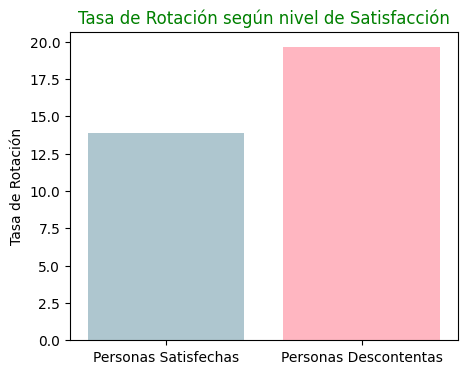

In [160]:
grupos_de_satisfaccion = ['Personas Satisfechas', 'Personas Descontentas']
tasa_rotacion_grupos_satisfaccion = [ 13.86, 19.65]

plt.figure(figsize=(5, 4))
plt.bar(grupos_de_satisfaccion, tasa_rotacion_grupos_satisfaccion, color= ['#AEC6CF', '#FFB6C1'])
plt.ylabel('Tasa de Rotación')
plt.title('Tasa de Rotación según nivel de Satisfacción', color= 'Green');

In [69]:
#3- Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.
#Prueba de hipotesis con método ttest_ind() con cada grupo.
# H0= Afirmamos que no hay diferencia
# H1= Afirmamos que si la hay, los datos no se corresponden.


In [70]:
grupo_a.columns

Index(['Employee_Number', 'Age', 'Age_Group', 'Attrition', 'Business_Travel',
       'Daily_Rate', 'Department', 'Distance_From_Home', 'Education',
       'Education_Field', 'Environment_Satisfaction', 'Gender', 'Hourly_Rate',
       'Job_Involvement', 'Job_Level', 'Job_Role', 'Job_Satisfaction',
       'Marital_Status', 'Monthly_Rate', 'Num_Companies_Worked', 'Over_Time',
       'Percent_Salary_Hike', 'Performance_Rating',
       'Relationship_Satisfaction', 'Stock_Option_Level',
       'Total_Working_Years', 'Training_Times_Last_Year', 'Work_Life_Balance',
       'Years_At_Company', 'Years_Since_Last_Promotion',
       'Years_With_Curr_Manager', 'Date_Birth', 'Remote_Work',
       'Satisfaction_Group'],
      dtype='object')

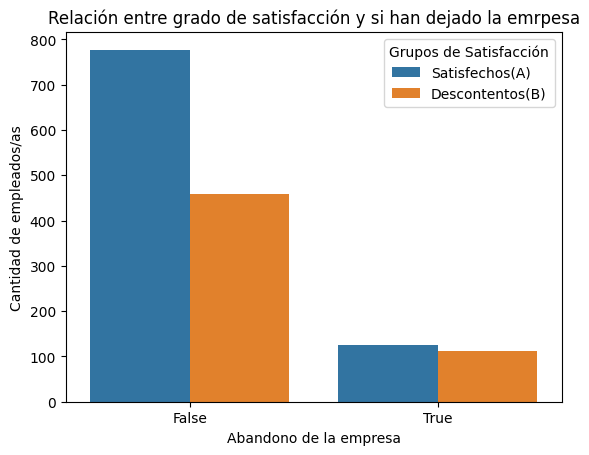

In [151]:
# Gráfico : 
sns.countplot(x="Attrition", data= df, hue="Satisfaction_Group")
plt.title("Relación entre grado de satisfacción y si han dejado la emrpesa")
plt.xlabel("Abandono de la empresa")
plt.ylabel("Cantidad de empleados/as")

new_labels = ['Satisfechos(A)', 'Descontentos(B)']
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, new_labels, title="Grupos de Satisfacción")
plt.show()
#Según este gráfico, podemos pensar, a simple vista, que no hay relación significativa entre el nivel de satisfacción y el abandono de la empresa.

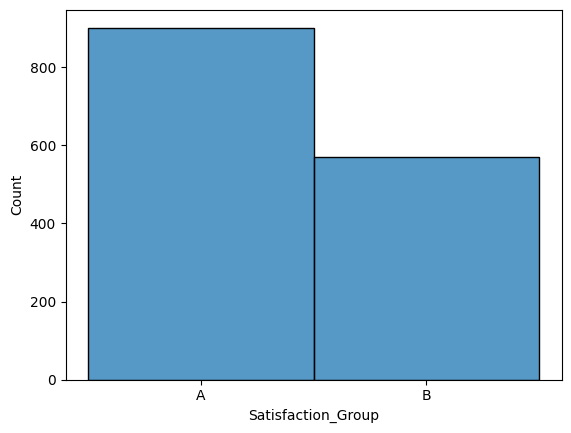

In [152]:
#En este gráfico vemos que hay más personas satisfechas frente a las que no lo están en el global de resultados.

sns.histplot(data= df, x= "Satisfaction_Group");
plt.show()

In [73]:
grupo_b.head(3)

,Employee_Number,Age,Age_Group,Attrition,Business_Travel,Daily_Rate,Department,Distance_From_Home,Education,Education_Field,Environment_Satisfaction,Gender,Hourly_Rate,Job_Involvement,Job_Level,Job_Role,Job_Satisfaction,Marital_Status,Monthly_Rate,Num_Companies_Worked,Over_Time,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_Since_Last_Promotion,Years_With_Curr_Manager,Date_Birth,Remote_Work,Satisfaction_Group
4,2070,46,46-55,False,Unknown,1319,Sales,3,3,Technical Degree,1,F,45,4,4,Sales Executive,1,Divorced,7739,2,False,0.12,3,4,1,11,5,3,19,2,8,1977,False,B
6,81,59,56-65,False,Unknown,1435,Sales,25,3,Life Sciences,1,F,99,3,3,Sales Executive,1,Unknown,2354,7,Unknown,0.11,3,4,0,28,3,2,21,7,9,1964,True,B
8,2071,41,36-45,False,Unknown,1276,Unknown,2,5,Unknown,2,F,91,3,4,Manager,1,Married,5626,7,False,0.16,3,2,1,22,2,3,18,11,8,1982,True,B


In [74]:
test_student= ttest_ind(a=grupo_a["Attrition"], b=grupo_b["Attrition"], equal_var=False)
test_student[1]

0.004316160331922343

In [162]:
alpha= 0.05

if test_student[1] > alpha:
    print(f"El p_value es: {test_student[1]}, por lo que no se rechaza la H0 . Es decir, NO encontramos diferencia significativa entre los grupos.")
else:
    print(f"El p_value es: {test_student[1].round(3)}, por lo que se rechaza la H0. Es decir, sí existe una diferencia significativa en la tasa de rotación.")


El p_value es: 0.004, por lo que se rechaza la H0. Es decir, sí existe una diferencia significativa en la tasa de rotación.


In [76]:
# 5- Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.
media_GrupoA= grupo_a["Attrition"].mean()
media_GrupoB =grupo_b["Attrition"].mean()
diferencia= (media_GrupoB-media_GrupoA).round(2)
print(f"La diferencia entre las medias de ambos grupos es de: {diferencia}")

La diferencia entre las medias de ambos grupos es de: 0.06


# Análisis Patri:

Divide a los empleados en los grupos A y B según los criterios establecidos.

Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.

Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.

Analiza los resultados.

Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.

##### Separamos grupos por nivel de satisfacción. Incluyendo TODOS los empleados (actuales y exempleados): 
- Grupo A = Satisfechos
- Grupo B = Descontentos

In [77]:
grupo_a = df[df['Satisfaction_Group'] == "A"]
grupo_b = df[df['Satisfaction_Group'] == "B"]

##### Calculamos número total de personas por nivel de satisfacción:

In [78]:
num_personas_satisfechas = grupo_a[grupo_a['Satisfaction_Group'] == "A"].shape[0]
num_personas_descontentas = grupo_b[grupo_b['Satisfaction_Group'] == "B"].shape[0]
print(f'el numero total de personas satisfechas es: \n {num_personas_satisfechas}')
print(f'el numero total de personas descontentas: \n {num_personas_descontentas}')

el numero total de personas satisfechas es: 
 902
el numero total de personas descontentas: 
 570


##### Separamos por rotación (Trabajan o no trabajan en la empresa) y nivel de satisfacción:

In [79]:
num_empleados_satisfechos = len(grupo_a[grupo_a['Attrition'] == False])
num_exempleados_satisfechos = len(grupo_a[grupo_a['Attrition'] == True])
print(f'El número de empleados satisfechos es: {num_empleados_satisfechos}')
print(f'El número de exempleados satisfechos es: {num_exempleados_satisfechos}')

El número de empleados satisfechos es: 777
El número de exempleados satisfechos es: 125


In [80]:
num_empleados_descontentos = len(grupo_b[grupo_b['Attrition'] == False])
num_exempleados_descontentos= len(grupo_b[grupo_b['Attrition'] == True])
print(f'El número de empleados actuales descontentos en la empresa es: {num_empleados_descontentos}')
print(f'El número de exempleados descontentos es: {num_exempleados_descontentos}')

El número de empleados actuales descontentos en la empresa es: 458
El número de exempleados descontentos es: 112


## Tasa de rotación de cada grupo:

In [81]:
tasa_rotacion_personas_satisfechas = num_exempleados_satisfechos / num_empleados_satisfechos  #Grupo A
tasa_rotacion_personas_descontentas = num_exempleados_descontentos / num_empleados_descontentos # Grupo B

print(f'Tasa de rotación de empleados satisfechos (Grupo A): {tasa_rotacion_personas_satisfechas:.2f}')
print(f'Tasa de rotación en el descontentos (Grupo B): {tasa_rotacion_personas_descontentas:.2f}')

Tasa de rotación de empleados satisfechos (Grupo A): 0.16
Tasa de rotación en el descontentos (Grupo B): 0.24


### Representación Gráfica de los resultados de tasas de rotación:

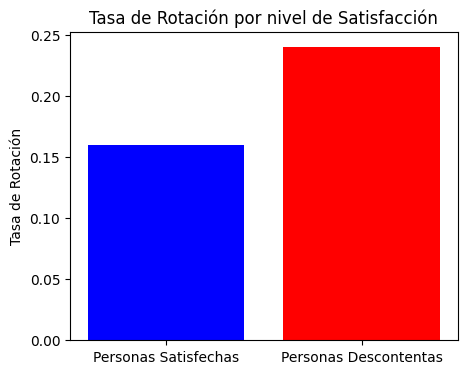

In [161]:
grupos_de_satisfaccion = ['Personas Satisfechas', 'Personas Descontentas']
tasa_rotacion_grupos_satisfaccion = [0.16, 0.24]

plt.figure(figsize=(5, 4))
plt.bar(grupos_de_satisfaccion, tasa_rotacion_grupos_satisfaccion, color=['blue', 'red'])
plt.ylabel('Tasa de Rotación')
plt.title('Tasa de Rotación por nivel de Satisfacción');

#### - Realizar un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.

- La estadística Z indica cuántas desviaciones estándar está el resultado observado lejos del valor esperado bajo la hipótesis nula. 

- Si el valor de Z es grande (ya sea positivamente o negativamente) y el valor p asociado es pequeño, esto sugiere que la diferencia observada no es una casualidad y que hay una diferencia significativa entre los grupos o condiciones que estás comparando.

In [83]:
count = np.array([num_exempleados_satisfechos , num_exempleados_descontentos])  # número de personas que dejaron la empresa en uestro Grupo A y B
nobs = np.array([num_personas_satisfechas , num_personas_descontentas])  # número de total de personas evaluadas.  (Total personas en Grupo A y B)

stat, pval = proportions_ztest(count, nobs)

print(f'Z-statistic: {stat:.2f}  ')
print(f'P-value: {pval:.4f}')
print('----------------------')
print('Al z value ser grande en comparacion al p value indica que hay una diferencia significativa y que no es una casualidad')

Z-statistic: -2.94  
P-value: 0.0032
----------------------
Al z value ser grande en comparacion al p value indica que hay una diferencia significativa y que no es una casualidad


##### Interpretación resultados:

- Z-statistic: -2.94: Este valor es negativo, lo que indica que la proporción de personas que dejaron la empresa en el Grupo A (empleados satisfechos) es menor que en el Grupo B (empleados descontentos). El valor absoluto que es mayor que 2 sugiere que la diferencia es significativa, pero la dirección de la diferencia es contraria a la del incremento numérico en los datos (es decir, hay menos rotación donde podríamos esperar más, o viceversa).

- P-value: 0.0032: Este es un valor muy bajo. Generalmente, un p-valor menor que 0.05 (5%) se considera suficiente para rechazar la hipótesis nula. Por lo tanto, un p-valor de 0.0032 indica que es muy improbable que la diferencia en las tasas de rotación entre los dos grupos se deba al azar. Asi que, podemos concluir con bastante seguridad que existe una diferencia significativa en las tasas de rotación entre los empleados satisfechos y los descontentos.

- Nota :La hipótesis nula sería en nuestro caso que no hay diferencia en las tasas de rotación entre los dos grupos.

##### Prueba Chi-cuadrado: 
- Prueba la independencia entre dos variables categóricas en una tabla de contingencia. Se usa para determinar si dos variables categóricas son independientes.

##### Hipótesis Nula (H0)
- H0: No hay asociación entre el estatus de empleo y el nivel de satisfacción.
##### Hipótesis Alternativa (H1)
- H1: Existe una asociación entre el estatus de empleo y el nivel de satisfacción.

Explicación resultados Prueba Chi-cuadrado:
- Chi-squared Test Statistic: Valor de la estadística de prueba chi-cuadrado. Un valor más alto sugiere una mayor desviación de la independencia.
- p-value: Si el p-valor es menor que el nivel de significancia (comúnmente 0.05), puedes rechazar la hipótesis nula de que las categorías son independientes. 
- Un p-valor bajo indica que las diferencias en las proporciones de satisfacción entre empleados y exempleados son estadísticamente significativas.
- Degrees of freedom: Calculado como (número de filas - 1) * (número de columnas - 1).
- Expected frequencies: Las frecuencias que se esperarían si las variables fueran independientes.

In [84]:
# Creamos DataFrame tabla de contingencia 
tabla_contingencia_chi = {'Satisfechos': [num_empleados_satisfechos, num_exempleados_satisfechos],
        'Descontentos': [num_empleados_descontentos, num_exempleados_descontentos]}

df_tabla_contingencia_chi = pd.DataFrame(tabla_contingencia_chi , index=['Empleados', 'Exempleados'])
df_tabla_contingencia_chi

,Satisfechos,Descontentos
Empleados,777,458
Exempleados,125,112


In [85]:
# Realizamos la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(df_tabla_contingencia_chi)  # formula sacada de stackoverflow

print("Chi-squared Test Statistic:", chi2)
print("p-value:", p)

Chi-squared Test Statistic: 8.247921426404371
p-value: 0.004079869230701133


#### Interpretación resultados Prueba chi cuadrado:
- Chi-squared Test Statistic: 8.2479

- El valor de la estadística de prueba chi-cuadrado es 8.2479. Este valor indica cuánto se desvían las frecuencias observadas de las frecuencias esperadas bajo la hipótesis nula. Un valor más alto sugiere una mayor desviación.
p-value: 0.0041

- El p-valor es 0.0041, lo cual es menor que el nivel de significancia comúnmente aceptado de 0.05. Esto significa que hay suficiente evidencia para rechazar la hipótesis nula de que el estatus de empleo y la satisfacción son independientes. En decir, parece haber una asociación significativa entre el estatus de empleo y la satisfacción.


#### Conclusión:
- Existe una diferencia significativa en los niveles de satisfacción entre los empleados actuales y los exempleados.

### Siguiente paso: Identificamos si hay alguna correlación entre la satisfacción (o descontento) y otras variables como el salario bruto, el tiempo en la empresa, puesto de trabajo, etc. ????

## HEATMAP

In [86]:
from itertools import combinations

In [87]:
# Seleccionamos las columnas numéricas de nuestro dataframe
numericas = df.select_dtypes(include= np.number).columns
numericas 

Index(['Employee_Number', 'Age', 'Daily_Rate', 'Distance_From_Home',
       'Education', 'Environment_Satisfaction', 'Hourly_Rate',
       'Job_Involvement', 'Job_Level', 'Job_Satisfaction', 'Monthly_Rate',
       'Num_Companies_Worked', 'Percent_Salary_Hike', 'Performance_Rating',
       'Relationship_Satisfaction', 'Stock_Option_Level',
       'Total_Working_Years', 'Training_Times_Last_Year', 'Work_Life_Balance',
       'Years_At_Company', 'Years_Since_Last_Promotion',
       'Years_With_Curr_Manager', 'Date_Birth'],
      dtype='object')

In [88]:
#Con la librería combinations, hacemos combinaciones de a 2 entre todas nuestras columnas
combinaciones = list(combinations(numericas, 2))
combinaciones

[('Employee_Number', 'Age'),
 ('Employee_Number', 'Daily_Rate'),
 ('Employee_Number', 'Distance_From_Home'),
 ('Employee_Number', 'Education'),
 ('Employee_Number', 'Environment_Satisfaction'),
 ('Employee_Number', 'Hourly_Rate'),
 ('Employee_Number', 'Job_Involvement'),
 ('Employee_Number', 'Job_Level'),
 ('Employee_Number', 'Job_Satisfaction'),
 ('Employee_Number', 'Monthly_Rate'),
 ('Employee_Number', 'Num_Companies_Worked'),
 ('Employee_Number', 'Percent_Salary_Hike'),
 ('Employee_Number', 'Performance_Rating'),
 ('Employee_Number', 'Relationship_Satisfaction'),
 ('Employee_Number', 'Stock_Option_Level'),
 ('Employee_Number', 'Total_Working_Years'),
 ('Employee_Number', 'Training_Times_Last_Year'),
 ('Employee_Number', 'Work_Life_Balance'),
 ('Employee_Number', 'Years_At_Company'),
 ('Employee_Number', 'Years_Since_Last_Promotion'),
 ('Employee_Number', 'Years_With_Curr_Manager'),
 ('Employee_Number', 'Date_Birth'),
 ('Age', 'Daily_Rate'),
 ('Age', 'Distance_From_Home'),
 ('Age', '

In [91]:
#creo funcion para ver si relaciones entre variables son lineales o no
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.
    Parameters:
    -----------
    dataframe : pandas.DataFrame
        El DataFrame que contiene las variables a analizar.
    lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.
    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.
    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.
    """
    relaciones_lineales = []
    relaciones_no_lineales = []
    for tupla in lista_combinacion_columnas:
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")
        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)
    return relaciones_lineales, relaciones_no_lineales
# llamamos a la funcion
lineal, no_lineal = identificar_linealidad(df, combinaciones)
print(f"Las variables a las que tenemos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tenemos que aplicar la correlacion de spearman son: {no_lineal}")


Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('Employee_Number', 'Age'), ('Employee_Number', 'Daily_Rate'), ('Employee_Number', 'Distance_From_Home'), ('Employee_Number', 'Education'), ('Employee_Number', 'Environment_Satisfaction'), ('Employee_Number', 'Hourly_Rate'), ('Employee_Number', 'Job_Involvement'), ('Employee_Number', 'Job_Level'), ('Employee_Number', 'Job_Satisfaction'), ('Employee_Number', 'Monthly_Rate'), ('Employee_Number', 'Num_Companies_Worked'), ('Employee_Number', 'Percent_Salary_Hike'), ('Employee_Number', 'Performance_Rating'), ('Employee_Number', 'Relationship_Satisfaction'), ('Employee_Number', 'Stock_Option_Level'), ('Employee_Number', 'Total_Working_Years'), ('Employee_Number', 'Training_Times_Last_Year'), ('Employee_Number', 'Work_Life_Balance'), ('Employee_Number', 'Years_At_Company'), ('Employee_Number', 'Years_Since_Last_Promotion'), ('Employee_Num

In [94]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame

df_correlaciones= df.corr(numeric_only= True, method= "spearman") 
df_correlaciones

,Employee_Number,Age,Attrition,Daily_Rate,Distance_From_Home,Education,Environment_Satisfaction,Hourly_Rate,Job_Involvement,Job_Level,Job_Satisfaction,Monthly_Rate,Num_Companies_Worked,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_Since_Last_Promotion,Years_With_Curr_Manager,Date_Birth,Remote_Work
Employee_Number,1.000000,-0.023286,-0.008641,-0.003960,0.019968,-0.012834,0.032396,-0.011030,0.049741,-0.012767,-0.035631,0.013785,0.009927,0.038006,0.006523,-0.103368,0.030928,-0.031190,-0.018505,-0.010234,-0.027818,-0.018255,-0.024701,0.023837,-0.008765
Age,-0.023286,1.000000,-0.171350,0.002868,-0.017778,0.203313,-0.002766,0.026554,0.033778,0.490447,-0.005106,0.017180,0.353150,0.006942,-0.002841,0.044895,0.057742,0.492240,0.001368,-0.014285,0.253467,0.173735,0.196590,-0.999786,-0.000360
Attrition,-0.008641,-0.171350,1.000000,-0.044616,0.038876,-0.030010,-0.101030,0.007302,-0.119173,-0.190854,-0.102725,0.015238,0.030310,-0.023012,0.004310,-0.042481,-0.172528,-0.139668,-0.051994,-0.042167,-0.190801,-0.053196,-0.175809,0.171548,0.025277
Daily_Rate,-0.003960,0.002868,-0.044616,1.000000,0.041224,-0.008326,0.038040,0.034775,0.042978,-0.007017,0.033697,-0.019977,0.001397,0.040812,0.000233,0.001004,0.028146,0.046285,-0.014243,-0.037413,0.001300,-0.021270,0.013766,-0.003428,-0.036663
Distance_From_Home,0.019968,-0.017778,0.038876,0.041224,1.000000,0.009097,0.022928,0.028724,0.034054,0.018844,-0.002527,0.029017,0.009766,0.052768,0.020463,-0.004807,0.043524,-0.039189,-0.044395,-0.029508,-0.013127,-0.021192,-0.009576,0.017624,-0.024356
Education,-0.012834,0.203313,-0.030010,-0.008326,0.009097,1.000000,-0.035816,-0.006072,0.036898,0.106425,-0.005292,-0.022214,0.134064,0.004676,-0.027640,-0.012637,0.013439,0.109484,-0.024050,0.020494,0.063718,0.032953,0.050661,-0.203838,-0.010544
Environment_Satisfaction,0.032396,-0.002766,-0.101030,0.038040,0.022928,-0.035816,1.000000,-0.034076,-0.019936,0.007041,0.026702,0.037643,-0.000216,-0.019485,-0.015296,-0.000475,0.006760,0.010872,-0.021491,0.034611,0.017221,0.034026,0.007801,0.002687,0.010098
Hourly_Rate,-0.011030,0.026554,0.007302,0.034775,0.028724,-0.006072,-0.034076,1.000000,0.031301,-0.029844,-0.052307,-0.002074,0.040248,-0.004842,0.006946,0.022964,0.043640,-0.026661,-0.002298,-0.040955,-0.047782,-0.060096,-0.031464,-0.026085,0.035695
Job_Involvement,0.049741,0.033778,-0.119173,0.042978,0.034054,0.036898,-0.019936,0.031301,1.000000,-0.019338,-0.011466,-0.016474,0.016359,-0.015894,-0.024854,0.037461,0.034160,0.009648,0.001788,-0.011966,0.012533,-0.009404,0.036290,-0.033995,-0.007526
Job_Level,-0.012767,0.490447,-0.190854,-0.007017,0.018844,0.106425,0.007041,-0.029844,-0.019338,1.000000,-0.001531,0.052207,0.178200,-0.034361,-0.018889,0.010942,0.048564,0.546677,-0.018917,0.024420,0.473445,0.268868,0.372300,-0.490606,-0.014378


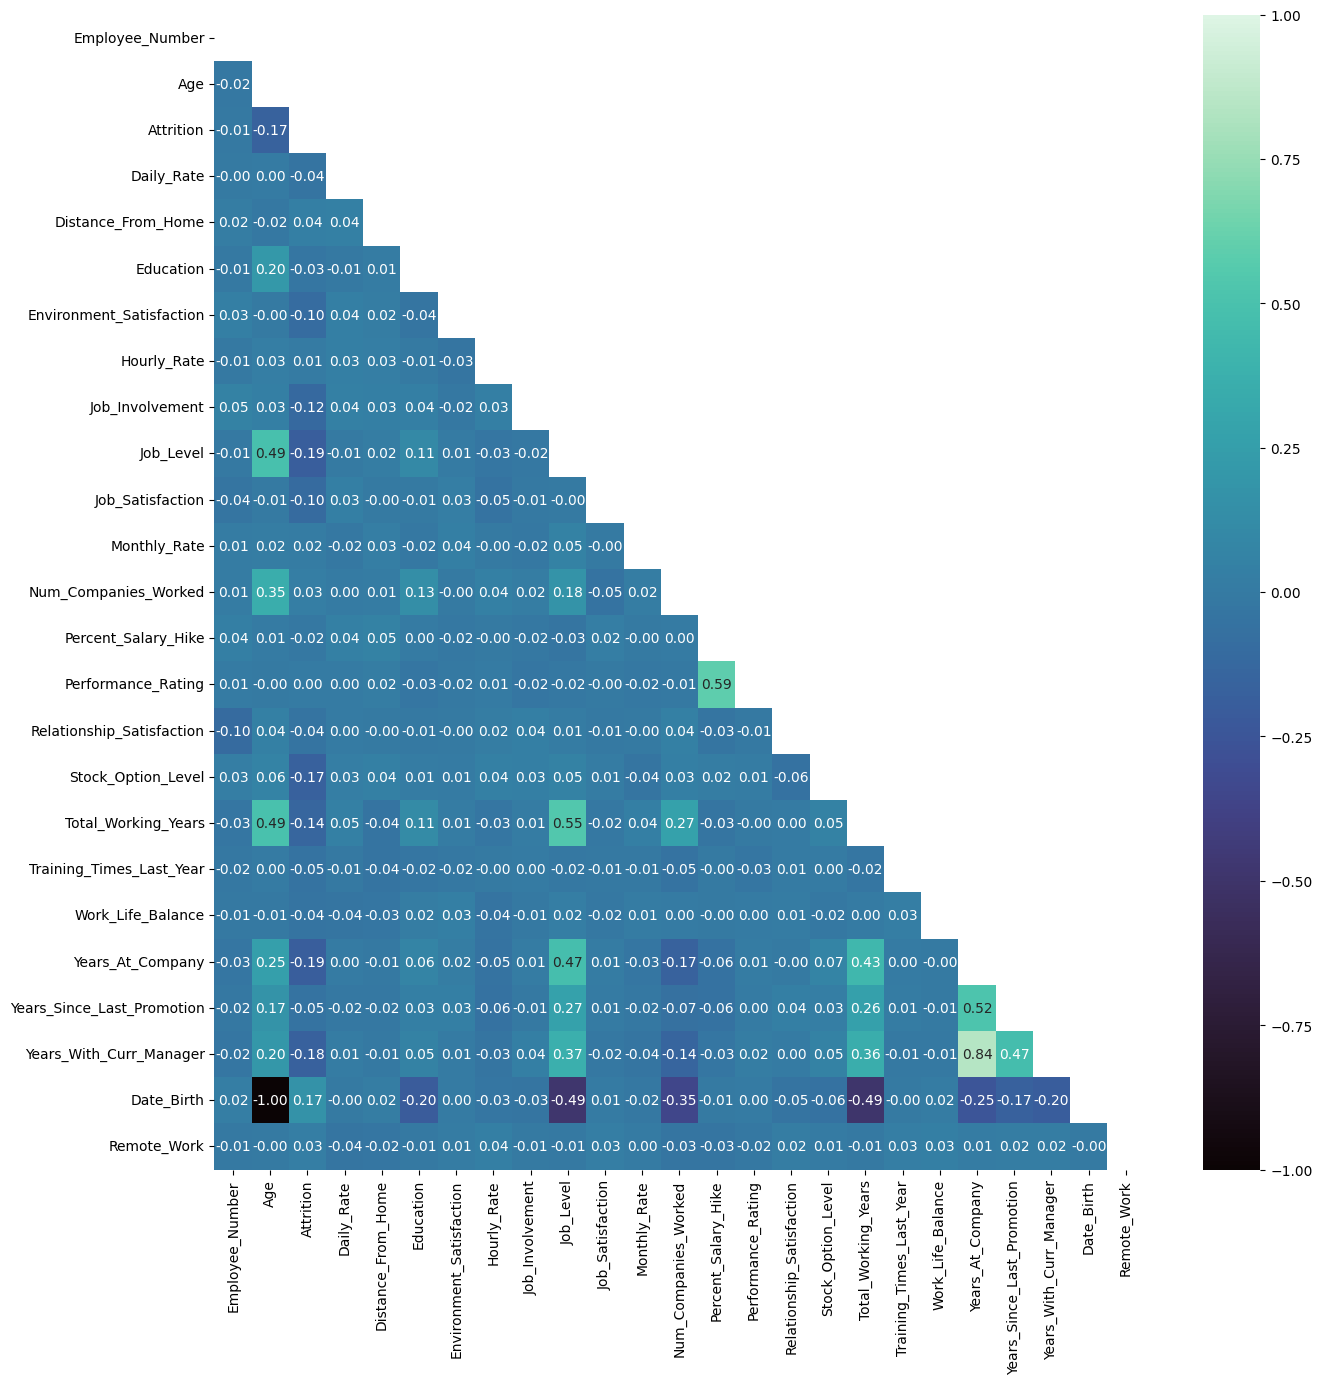

In [96]:
#Hacemos una mascara para que no aparezca la información duplicada
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))
# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_correlaciones, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1, 
            mask= mask); # para identificar el valor mínimo de nuestra escala de colores

//years at company tiene correlacion fuerte con years with current manager

//years with current manager y years since last promotion tienen correlacion moderada
//years since last promotion y years at company tienen correlacion moderada
//years at company y total working years tienen correlacion moderada
//years with current manager y total working years tienen correlacion moderada

//job level y total working years tienen correlacion moderada
//years at company y job level tienen correlacion moderada
//years with current manager y job level tienen correlacion moderada

//percent salary hike y perfomance rating tienen correlacion moderada

//total working years y age tienen correlacion moderada
num companys worked y age tienen correlacion moderada
job level y age tienen correlacion moderada




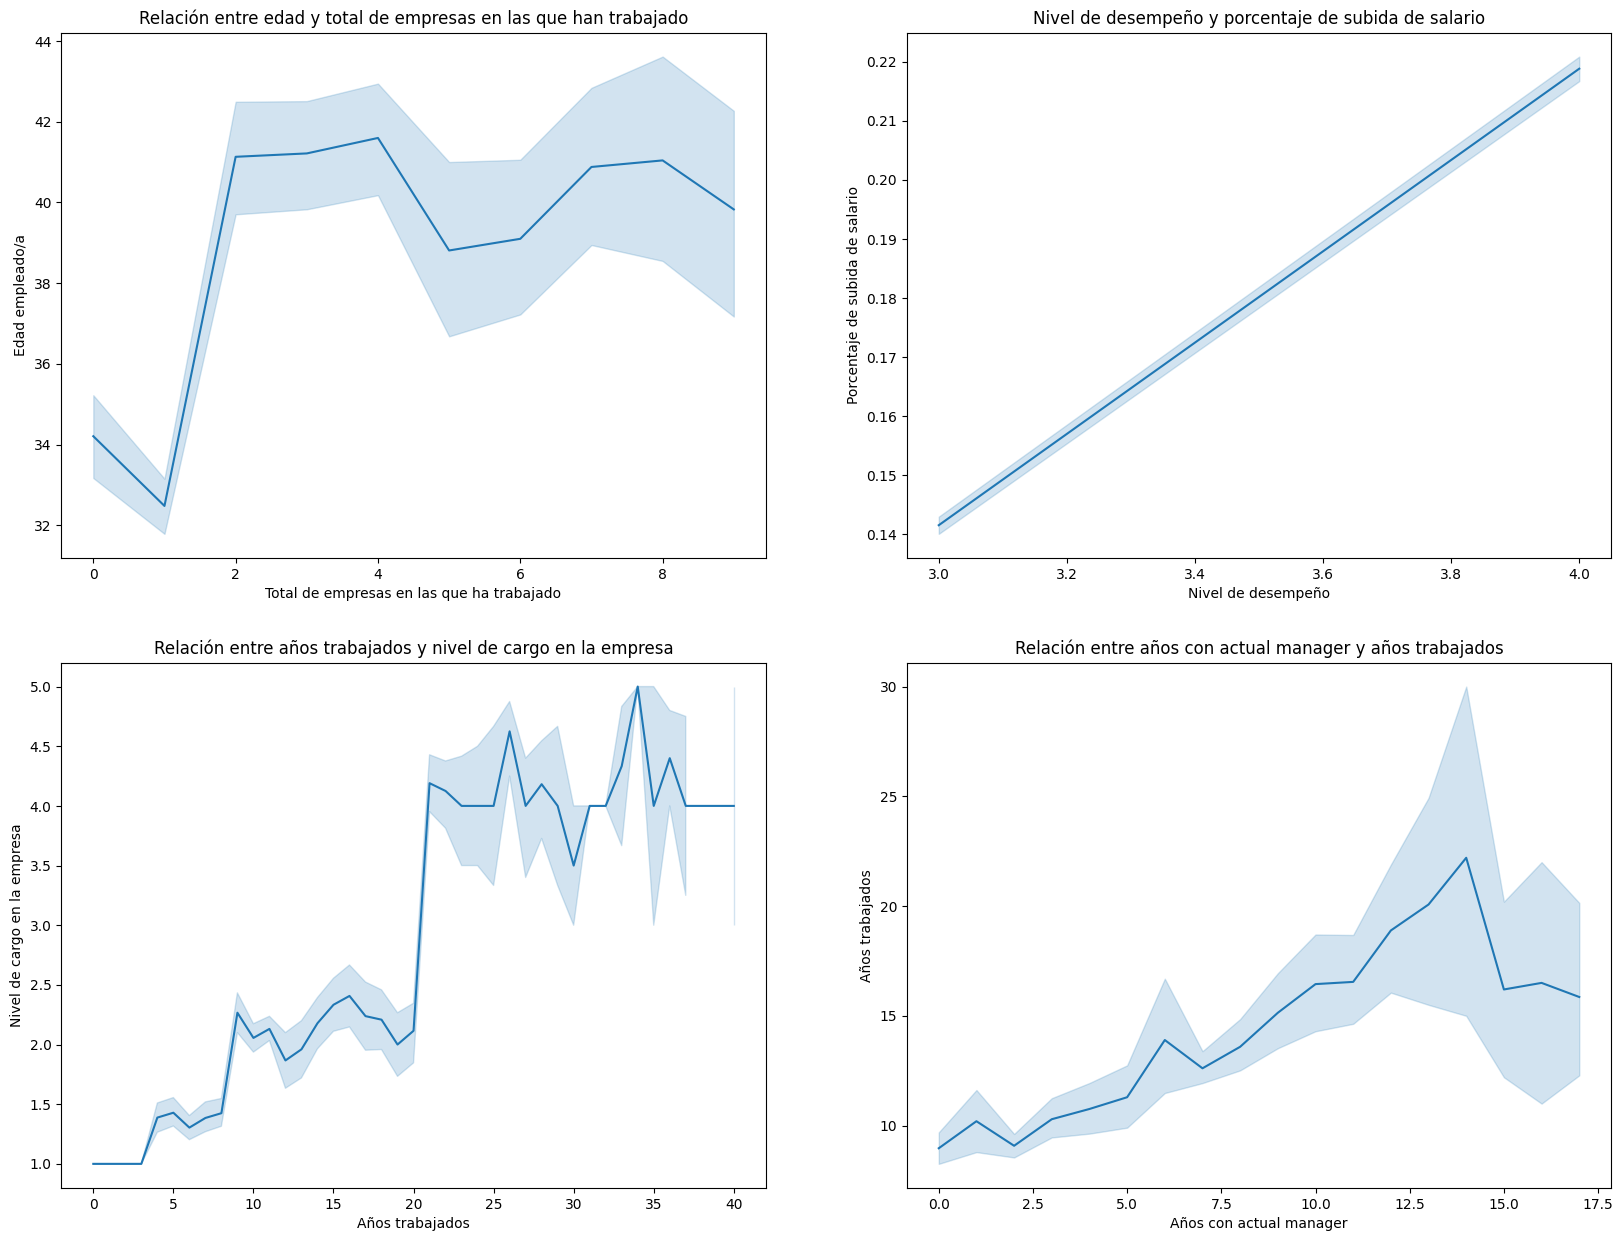

In [164]:
fig, axes= plt.subplots(2, 2, figsize= (20, 15))

#num companys worked y age tienen correlacion moderada
sns.lineplot(x= "Num_Companies_Worked", y= "Age", data=df, ax=axes[0,0]);
# Los empleados entre 40 y 42 años han trabajado en más empresas que los empleados más jóvenes que ellos.
axes[0, 0].set_title('Relación entre edad y total de empresas en las que han trabajado')
axes[0, 0].set_xlabel('Total de empresas en las que ha trabajado')
axes[0, 0].set_ylabel('Edad empleado/a')

#percent salary hike y perfomance rating tienen correlacion MODERADA
sns.lineplot(x= "Performance_Rating", y="Percent_Salary_Hike", data=df, ax =axes[0,1]);
#A más nivel de desempeño, más sube el porcentaje de los salarios.
# Señal de prácticas saludables de la empresa, que recompensan a los empleados con un buen nivel de desempeño con aumentos de sueldo.
axes[0, 1].set_title('Nivel de desempeño y porcentaje de subida de salario')
axes[0, 1].set_xlabel('Nivel de desempeño')
axes[0, 1].set_ylabel('Porcentaje de subida de salario')

#job level y total working years tienen correlacion MODERADA
sns.lineplot(data=df, x='Total_Working_Years', y='Job_Level', ax =axes[1,0])
#A más años trabajados, más aumenta el cargo de los trabajadores. Lo que puede indicar que hay promoción en los empleados de la empresa a medida que pasan los años.
axes[1, 0].set_title('Relación entre años trabajados y nivel de cargo en la empresa')
axes[1, 0].set_xlabel('Años trabajados')
axes[1, 0].set_ylabel('Nivel de cargo en la empresa')

#years with current manager y total working years tienen correlacion MODERADA
sns.lineplot(data=df, x='Years_With_Curr_Manager', y='Total_Working_Years', ax =axes[1,1])
axes[1, 1].set_title('Relación entre años con actual manager y años trabajados')
axes[1, 1].set_xlabel('Años con actual manager')
axes[1, 1].set_ylabel('Años trabajados')

plt.show()



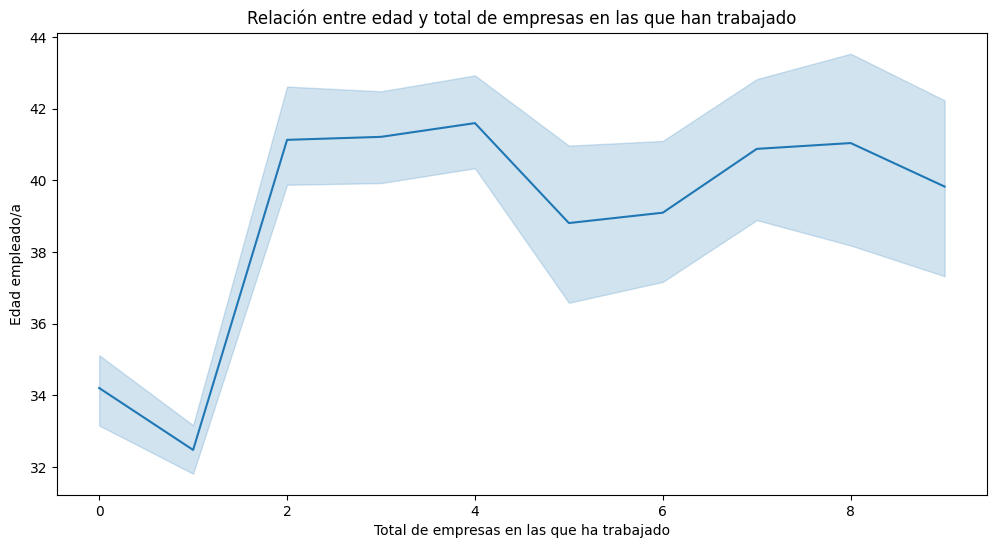

In [145]:
plt.figure(figsize=(12, 6))


#num companys worked y age tienen correlacion moderada
sns.lineplot(x= "Num_Companies_Worked", y= "Age", data=df);
# Los empleados entre 40 y 42 años han trabajado en más empresas que los empleados más jóvenes que ellos.
plt.title('Relación entre edad y total de empresas en las que han trabajado')
plt.xlabel('Total de empresas en las que ha trabajado')
plt.ylabel('Edad empleado/a')
plt.show()

"Years at company" tiene correlacion fuerte con "Years with current manager"
    
    -Deducimos que no se puede estar más años en la compañía que los años con el manager actual.
    -Y que no hay mucha rotación de managers.


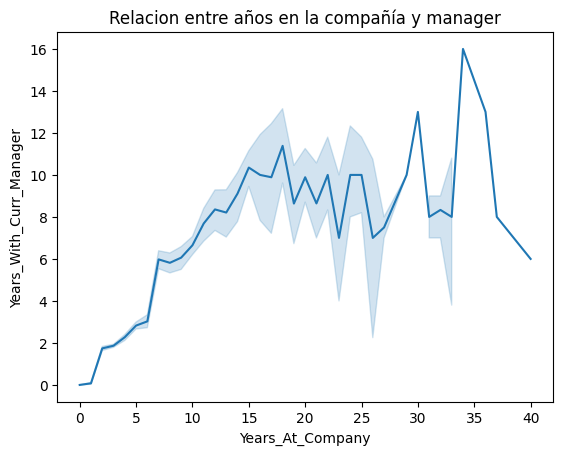

In [146]:
sns.lineplot(x= "Years_At_Company", y= "Years_With_Curr_Manager", data= df );
plt.title("Relacion entre años en la compañía y manager")
plt.show()